In [113]:
# STEP 1: IMPORTS AND INITIALIZATION
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random


In [115]:
# STEP 2: INITIALIZE REACTION NETWORK
# Start with a simple 2-node network
G = nx.Graph()
G.add_edge(0, 1, weight=1.0)


In [117]:
# STEP 3: NETWORK GROWTH FUNCTION
def grow_network(G, new_node_id):
    """
    Adds a new node to the network and connects it to 1–2 existing nodes
    with randomly weighted edges representing geometric 'distance'.
    """
    G.add_node(new_node_id)
    if len(G.nodes) < 2:
        return
    # Connect to up to 2 existing nodes (excluding the new one)
    connections = random.sample(list(G.nodes())[:-1], k=min(2, len(G.nodes()) - 1))
    for target in connections:
        G.add_edge(new_node_id, target, weight=random.uniform(0.5, 2.0))


In [119]:
# STEP 4: METRIC TENSOR FUNCTION
def local_metric_tensor(G, node_id):
    """
    Constructs a simple 2D metric tensor (diagonal) for a node using two edge weights.
    """
    neighbors = list(G.neighbors(node_id))
    if len(neighbors) < 2:
        return np.eye(2)
    
    d1 = G[node_id][neighbors[0]]['weight']
    d2 = G[node_id][neighbors[1]]['weight']
    
    return np.array([[d1**2, 0],
                     [0,     d2**2]])


In [121]:
# STEP 5: CURVATURE APPROXIMATION FUNCTION
def approximate_scalar_curvature(G, node_id):
    """
    Approximates scalar curvature at a node based on local edge geometry.
    Higher curvature = tighter network constraints.
    """
    neighbors = list(G.neighbors(node_id))
    if len(neighbors) < 2:
        return 0.0
    
    d1 = G[node_id][neighbors[0]]['weight']
    d2 = G[node_id][neighbors[1]]['weight']
    
    return 1.0 / (d1 * d2 + 1e-5)  # avoid division by zero


In [123]:
# STEP 6: RUN FULL SIMULATION
curvatures = []
sizes = []

for i in range(2, 100):
    grow_network(G, i)
    
    local_curvatures = []
    for node in G.nodes:
        R = approximate_scalar_curvature(G, node)
        local_curvatures.append(R)
    
    avg_curvature = np.mean(local_curvatures)
    curvatures.append(avg_curvature)
    sizes.append(len(G.nodes()))


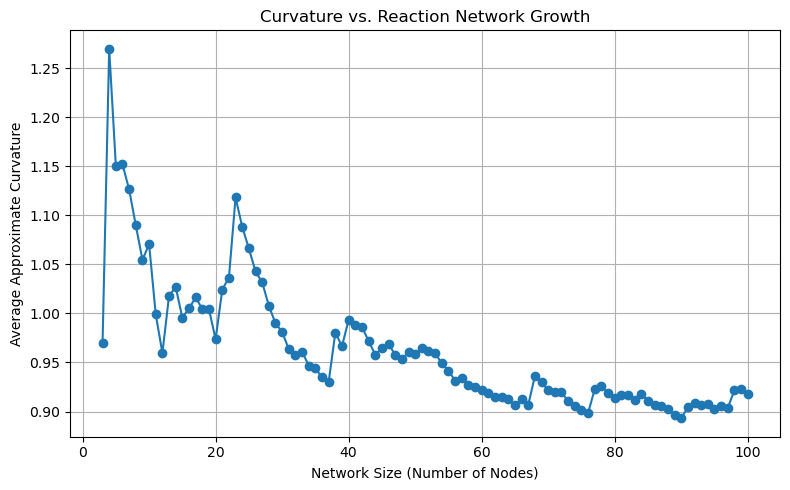

In [125]:
# STEP 7: PLOT RESULTS
plt.figure(figsize=(8, 5))
plt.plot(sizes, curvatures, marker='o', linestyle='-')
plt.xlabel("Network Size (Number of Nodes)")
plt.ylabel("Average Approximate Curvature")
plt.title("Curvature vs. Reaction Network Growth")
plt.grid(True)
plt.tight_layout()
plt.show()
